In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
for col in df.columns:
    print(col)

car_ID
symboling
CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
wheelbase
carlength
carwidth
carheight
curbweight
enginetype
cylindernumber
enginesize
fuelsystem
boreratio
stroke
compressionratio
horsepower
peakrpm
citympg
highwaympg
price


In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in df:
    df[i] = label_encoder.fit_transform(df[i])
    df

In [11]:
corr_matrix = df.corr()['price']
corr_matrix

car_ID              0.012452
symboling          -0.089579
CarName            -0.096100
fueltype           -0.140119
aspiration          0.307676
doornumber         -0.115160
carbody             0.006444
drivewheel          0.600088
enginelocation      0.200113
wheelbase           0.685544
carlength           0.802523
carwidth            0.815487
carheight           0.249139
curbweight          0.905891
enginetype         -0.023271
cylindernumber      0.045351
enginesize          0.818392
fuelsystem          0.707890
boreratio           0.627766
stroke              0.102965
compressionratio   -0.135919
horsepower          0.846130
peakrpm            -0.091529
citympg            -0.806431
highwaympg         -0.813222
price               1.000000
Name: price, dtype: float64

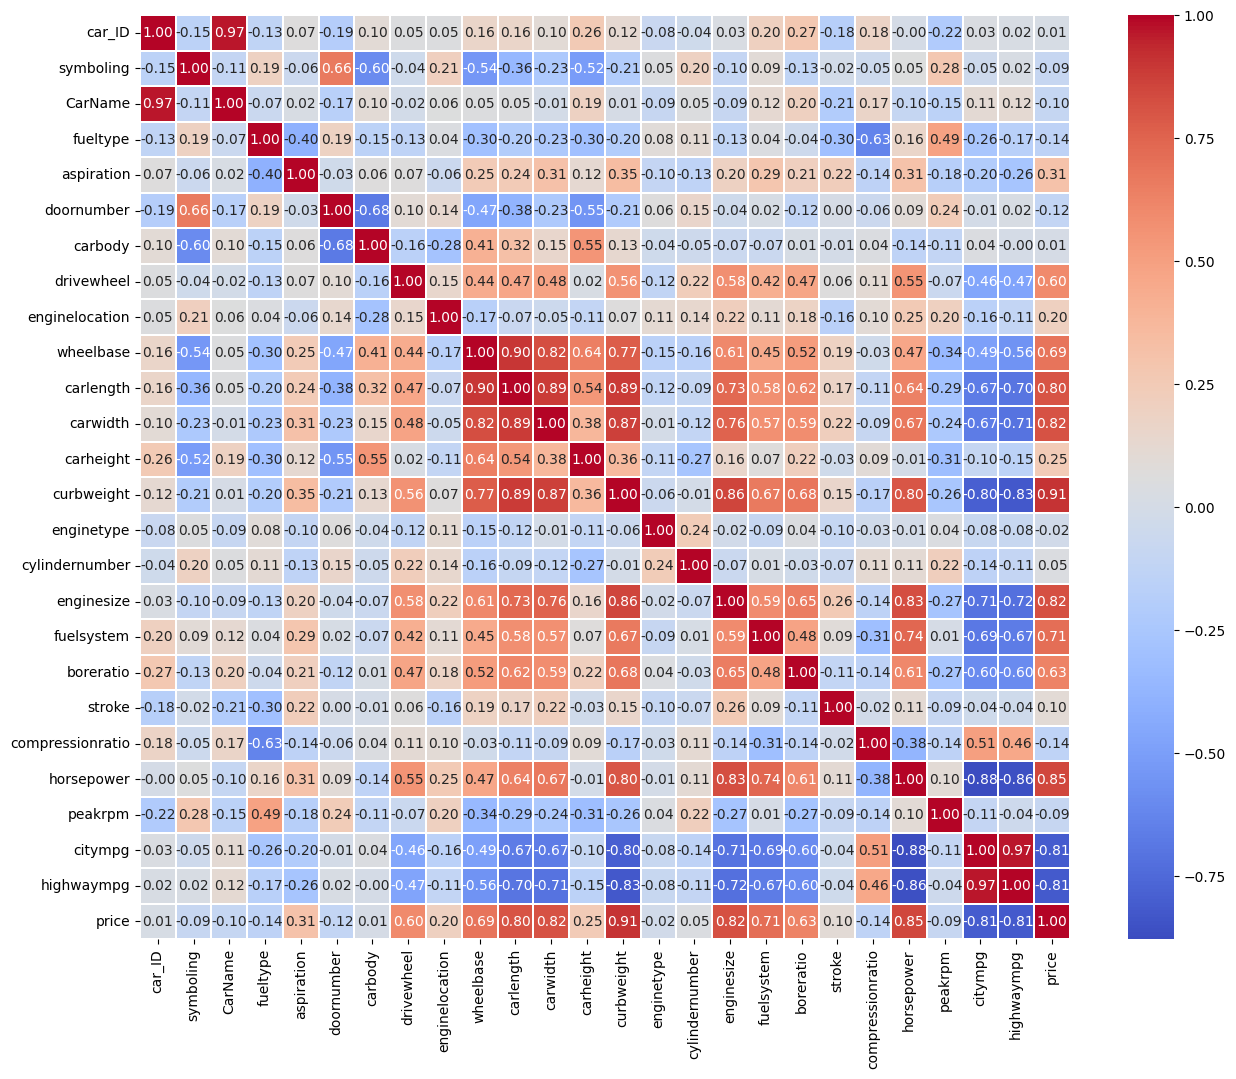

In [13]:
corrmatrix = df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corrmatrix, annot=True, cmap='coolwarm',fmt='.2f',linewidths=0.3)

plt.show()

In [14]:
new_columns=['drivewheel','wheelbase','carlength','carwidth',
                 'curbweight','cylindernumber','enginesize','fuelsystem','boreratio','horsepower','citympg','highwaympg']
new_df=df[new_columns]
new_df.head()

,drivewheel,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
0,2,2,22,8,92,2,18,5,23,30,8,10
1,2,2,22,8,92,2,18,5,23,30,8,10
2,2,10,29,16,115,3,28,5,1,45,6,9
3,1,30,45,21,66,2,11,5,13,27,11,13
4,0,28,45,23,116,1,22,5,13,33,5,5


In [15]:
x=new_df[["drivewheel","wheelbase","carlength","carwidth","curbweight","enginesize","fuelsystem","boreratio","horsepower","citympg","highwaympg"]]
y=df[["price"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75)

x



,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
0,2,2,22,8,92,18,5,23,30,8,10
1,2,2,22,8,92,18,5,23,30,8,10
2,2,10,29,16,115,28,5,1,45,6,9
3,1,30,45,21,66,11,5,13,27,11,13
4,0,28,45,23,116,22,5,13,33,5,5
...,...,...,...,...,...,...,...,...,...,...,...
200,2,46,63,34,125,24,5,35,32,10,11
201,2,46,63,33,135,24,5,35,48,6,8
202,2,46,63,34,129,33,5,26,38,5,6
203,2,46,63,34,151,25,3,6,28,13,10


In [16]:
from sklearn.linear_model import LinearRegression

 



In [17]:
r=LinearRegression()
r


 



LinearRegression()

In [18]:
r.fit(x,y)

LinearRegression()

In [19]:
p=r.predict(x_test) 
p

array([[138.26236546],
       [ 47.85084479],
       [156.46573614],
       [ 43.39673347],
       [ 20.76492146],
       [162.00261381],
       [175.4804571 ],
       [164.4337654 ],
       [ 36.06080538],
       [ 16.83470921],
       [142.47771014],
       [150.45628983],
       [142.11321271],
       [ 33.17687918],
       [ 97.48075082],
       [ 42.92936081],
       [179.48502746],
       [ 28.44599282],
       [158.75556614],
       [ 75.4720727 ],
       [ 96.88551106],
       [ 90.89100684],
       [ 81.66363117],
       [122.57806051],
       [101.33164127],
       [ 91.17596886],
       [ 98.00629048],
       [137.73274048],
       [ 61.52499942],
       [107.23359875],
       [ 72.50282328],
       [ 24.28847965],
       [ 76.57848791],
       [111.3725032 ],
       [ 67.89094106],
       [ 32.02539692],
       [155.85444547],
       [149.6305366 ],
       [ 98.42162156],
       [ 74.45998801],
       [ 30.03486775],
       [ 30.03486775],
       [126.05390742],
       [138

In [20]:
value=[[2,2,22,8,92,18,5,23,30,8,10,]]
predicted=r.predict(value)
predicted

C:\Users\Adarsh surendran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[101.33164127]])

In [21]:
r.score(x,y)

0.8761502036589921

In [22]:
x.head(1)

,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
0,2,2,22,8,92,18,5,23,30,8,10


In [23]:
y.head(1)

,price
0,118
